In [0]:
import random
import statistics 
import scipy
import matplotlib.pyplot as plt


x1 = []
x2 = []
y = []
noise = []
for i in range(1000):  #做出x1,x2的資料
  noise.append(scipy.stats.norm.rvs(loc=0, scale=1))
  x1.append(random.uniform(-1,1))
  x2.append(random.uniform(-1,1))

for i in range(1000): #做出y的資料
    y.append(2*(x1[i]**2)+(x2[i]**2)-2*x1[i]*x2[i]+2*x1[i]-x2[i]+noise[i])

print(x1[i]," ",x2[i]," ",y[i]) #取其中一組數據show出來

0.3162853761216353   -0.5383378274520145   2.5263893159996673


In [0]:
from sklearn import linear_model

parameters = []
for i in range(1000):
  parameters.append([x1[i]**2,x2[i]**2,x1[i]*x2[i],x1[i],x2[i]])

LR = linear_model.LinearRegression()
LR.fit(parameters,y)  #產生model

print("coefficient1:",LR.coef_[0],"\ncoefficient2:",LR.coef_[1],"\ncoefficient3:",LR.coef_[2],"\ncoefficient4:",LR.coef_[3],"\ncoefficient5:",LR.coef_[4],"\nintercept:",LR.intercept_)

coefficient1: 1.7032390088923246 
coefficient2: 1.0405844669970123 
coefficient3: -2.0206988852559737 
coefficient4: 2.0597757714823954 
coefficient5: -0.8931225370907809 
intercept: 0.07296720807553692


In [0]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

y_predict = LR.predict(parameters)
print("MAE:",mean_absolute_error(y,y_predict))


MAE: 0.781787803199892
ERROR! Session/line number was not unique in database. History logging moved to new session 64


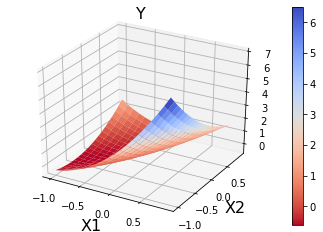

In [0]:

fig = plt.figure()
axis = fig.gca(projection='3d')
 
#產出X1,X2,Y數據
x1 = np.arange(-1.0, 1.0, 0.1)
x2 = np.arange(-1.0, 1.0, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Z = 1.703239*X1**2+1.040584*X2**2+(-2.020698*X1*X2)+2.059775*X1+(-0.893122*X2)+0.0729672
 
#畫圖
surface = axis.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap='coolwarm_r')
fig.colorbar(surface, shrink=1.0, aspect=20)
 
# 設置圖表訊息
plt.title("Y", fontsize=16)
plt.xlabel("X1", fontsize=16)
plt.ylabel("X2", fontsize=16)
 
plt.show()